# Assignment 1: CSE3NLP/CSE5NLP Semester 1, 2023

The assignment contains a total of three problems/tasks. The mark distribution for these tasks are as follows: 

* Problem 1: 20 marks 
* Problem 2: 35 marks 
* Problem 3: 45 marks 

A more detail marking rubric will be uploaded on LMS soon. 

### Problem 1 Regular Expressions

Write An Eliza style chatbot that can hold conversations along the lines of the following conversation. The parantheses provide options of input.

1. Person: Where am I?
* Bot: Next to me.

2. Person: (How did I come here?) (What brought me here?) (What am I doing here?)
* Bot: You have been selected by the Matrix.

3. Person: (who is the matrix?) (Who is this Matrix you talking about?) (What are you talking about?)
* Bot: It is the future.

4. Person: (anything else, except bye)
* Bot: Things will become clearer soon. 

To implement the chatbot complete the following tasks: 
1. Write a function that takes a message as the argument and returns a string, i.e., the response. Your function must use regular expression to generate the response. 
2. Write a program that interacts with a user indefinitely until the user types 'bye'. Your program must make use of the function in the above task. 



In [ ]:
import re

#words for matching and responding

str1 = r'\bwhere\b'
str2 = r'\bhere\b'
str3 = r'\bwho\b'
str4 = r'\bmatrix\b'
str5 = r'\btalking\b'
str6 = r'\belse\b'
str7 = r'\bexcept\b'

reply1 = 'Next to me.'
reply2 = 'You have been selected by the Matrix.'
reply3 = 'It is the future.'
reply4 = 'Things will become clearer soon.'

In [ ]:
#response of Eliza

def resp(message):
    if re.search(str1, message.lower()):
        return reply1
    elif re.search(str2, message.lower()):
        return reply2
    elif re.search(str3, message.lower()):
        return reply3
    elif re.search(str4, message.lower()):
        return reply3
    elif re.search(str5, message.lower()):
        return reply3
    elif re.search(str6, message.lower()):
        return reply4
    elif re.search(str7, message.lower()):
        return reply4
    else:
        return 'Goodbye'

In [ ]:
#interaction with user

print('Eliza here. What can I do for you?')
while True:
    message = input("You: ")
    if message.lower() == "bye":
        print("Elize: Goodbye.")
        break
    else:
        text = resp(message)
        print("Eliza: " + text)

## Problem 2 Author Attribution using the n-gram language model

Authorship Attribution is the problem of identifying the author of a given document by looking at other writings by the same author. 

For example, given two novels by William Shakespeare and two by Jane Austen, try to identity the potential author of a sentence that didn't appear in any of the novels given.

One way of tackling this problem is to learn two n-gram models, one for Shakespeare and one Austen. Then lookup the probablities of all the n-grams in the new sentence and multiply them to end up with the total liklihood of the sentence. More concretely:
### Training
1. 
$$novel\_by\_austen =  \{gram^{austen}_0, gram^{austen}_1,\dots ,gram^{austen}_N\}$$
$$P(gram_i|austen) = \frac{Count(gram^{austen}_i) + 1}{N + V}$$
$$N : \text{Total number of N-grams in the text by Austen}, V : \text{Number of unique n-grams in the text by Austen} $$  

2. 
$$novel\_by\_shakespeare =  \{gram^{shakespeare}_0, gram^{shakespeare}_1,\dots ,gram^{shakespeare}_N\}$$
$$P(gram_i|shakespeare) = \frac{Count(gram^{shakespeare}_i) + 1}{N + V}$$
$$N : \text{Total number of N-grams in the text by Shakespeare}, V : \text{Number of unique n-grams in the text by Shakespeare} $$  

### Testing 
$$sentence = \{gram_0, gram_1,\dots ,gram_N\}$$

$$P(sentence | shakespeare)\approx\prod_i P(gram_i|shakespeare)$$
$$P(sentence | austen)\approx\prod_i P(gram_i|austen)$$

$$P(author|sentence) = \max(P(sentence | shakespeare), P(sentence | austen))$$

Reminder: multiplying probablities is problematic. 

You are given a simple skeleton code for the data to use. However, please feel free to add more code blocks for your implementation. 

Implement the algorithm outlined above, and use the respective training and test sets to check the correctness.  

In [44]:
import nltk
nltk.download("all", quiet=True)

True

In [45]:
from nltk.corpus import gutenberg

In [46]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [47]:
# import libraries needed, read the dataset
import nltk, re, string
from nltk import word_tokenize, sent_tokenize

In [48]:
sh1 = gutenberg.open('shakespeare-caesar.txt').read()
sh2 = gutenberg.open('shakespeare-hamlet.txt').read()
sh3 = gutenberg.open('shakespeare-macbeth.txt').read()

# shakespeare training data
sh1 = sh1[62:]
sh2 = sh2[55:]

# shakespeare testing data
sh3 = sh3[56:]

In [49]:
au1 = gutenberg.open('austen-emma.txt').read()
au2 = gutenberg.open('austen-persuasion.txt').read()
au3 = gutenberg.open('austen-sense.txt').read()

# austen training data
au1 = au1[28:]
au2 = au2[35:]

# austen testing data
au3 = au3[45:]

In [50]:
import string
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
string.punctuation = string.punctuation.replace('.', '')

def preprocess_text(text):
  line_nl_removed = text.replace("\n", " ")      #removes newlines
  line_nl_removed = re.sub(r'\s{2,}', r' ', line_nl_removed) # remove spaces
  line_n1_removed = re.sub(r'VOLUME [MDCLXVI]+ CHAPTER [MDCLXVI]+ ', '', line_nl_removed)
  chars = "".join([char.lower() for char in line_nl_removed if char not in string.punctuation])
  sents = ''
  for sent in sent_tokenize(chars): 
    sents += sent.replace(".", " . ")
  sents = re.sub(r'volume [mdclxvi]+ chapter [mdclxvi]+ ', '', sents)
  return sents


In [51]:
#preprocess data
sh_proc = preprocess_text(sh1+sh2)
sh_proc

'actus primus . scoena prima . enter flauius murellus and certaine commoners ouer the stage . flauius . hence home you idle creatures get you home is this a holiday what know you not being mechanicall you ought not walke vpon a labouring day without the signe of your profession speake what trade art thou car . why sir a carpenter mur . where is thy leather apron and thy rule what dost thou with thy best apparrell on you sir what trade are you cobl . truely sir in respect of a fine workman i am but as you would say a cobler mur . but what trade art thou answer me directly cob . a trade sir that i hope i may vse with a safe conscience which is indeed sir a mender of bad soules fla .  what trade thou knaue thou naughty knaue what trade cobl . nay i beseech you sir be not out with me yet if you be out sir i can mend you mur . what meanst thou by that mend mee thou sawcy fellow cob . why sir cobble you fla .  thou art a cobler art thou cob . truly sir all that i liue by is with the aule i m

In [86]:
#preprocess data
au_proc = preprocess_text(au1+au2)
au_proc

'emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her . she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period . her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection . sixteen years had miss taylor been in mr .  woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma . between them it was more the intimacy of sisters . even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the 

In [95]:
def split_to_sentences(text):

    sentences = text.split(' . ')
    
    # Additional clearning
    
    # Remove leading and trailing spaces from each sentence
    sentences = [s.strip() for s in sentences]
    
    # Drop sentences if they are empty strings
    sentences = [s for s in sentences if len(s) > 0]
    
    return sentences

sent_sh_proc = split_to_sentences(sh_proc)
sent_au_proc = split_to_sentences(au_proc)

In [98]:
def count_n_grams(sentences, n, start_token='<s>', end_token = '<e>'):
    
    # Initialize dictionary of n-grams and their counts
    n_grams = {}
    
    # Go through each sentence in the data
    for sentence in sentences: # complete this line
        
        #split into words
        words = sentence.split()
        
        # prepend start token n times, and  append <e> one time
        words = [start_token] * n + words + [end_token]
        
        # convert list to tuple
        # So that the sequence of words can be used as
        # a key in the dictionary
        words = (words)
        
        # Use 'i' to indicate the start of the n-gram
        # from index 0
        # to the last index where the end of the n-gram
        # is within the sentence.
        
        for i in range(len(words) - n + 1): # complete this line

            # Get the n-gram from i to i+n
            n_gram = tuple(words[i:i+n])

            # check if the n-gram is in the dictionary
            if n_gram in n_grams: # complete this line
            
                # Increment the count for this n-gram
                n_grams[n_gram] += 1
            else:
                # Initialize this n-gram count to 1
                n_grams[n_gram] = 1
    return n_grams

In [99]:
#shakespeare


sh_bigram = count_n_grams(sh_proc, 2)
print("total n_gram for shakespeare:")
print(sum(sh_bigram.values()))

#austen
au_bigram = count_n_grams(au_proc, 2)
print("total n_gram for austen:")
print(sum(au_bigram.values()))

total n_gram for shakespeare:
734853
total n_gram for austen:
3695535


In [80]:
def estimate_probability(text, previous_n_gram, 
                         n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing
    
    Args:
        word: next word
        previous_n_gram: A sequence of words of length n
        n_gram_counts: Dictionary of counts of n-grams
        n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
        vocabulary_size: number of words in the vocabulary
        k: positive constant, smoothing parameter
    
    Returns:
        A probability
    """
    # Calculate the probability as the numerator divided by denominator
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
        
    # Set the denominator
    # If the previous n-gram exists in the dictionary of n-gram counts,
    # Get its count.  Otherwise set the count to zero
    # Use the dictionary that has counts for n-grams
    previous_n_gram_count = n_gram_counts.get(previous_n_gram, 0)
        
    # Calculate the denominator using the count of the previous n gram
    # and apply k-smoothing
    denominator = previous_n_gram_count + (k * vocabulary_size)

    # Define n plus 1 gram as the previous n-gram plus the current word as a tuple
    n_plus1_gram = previous_n_gram + (text,)
  
    # Set the count to the count in the dictionary,
    # otherwise 0 if not in the dictionary
    # use the dictionary that has counts for the n-gram plus current word
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram, 0)
        
    # Define the numerator use the count of the n-gram plus current word,
    # and apply smoothing
    numerator = n_plus1_gram_count + k

    # Calculate the probability as the numerator divided by denominator
    probability = numerator / denominator
    
    
    return probability

In [110]:
unique_words_sh = list(set(sh_proc[0] + sh_proc[1]))
unique_words_au = list(set(au_proc[0] + au_proc[1]))

unigram_counts_sh = count_n_grams(sh_proc, 1)
bigram_counts_sh = count_n_grams(sh_proc, 2)

unigram_counts_au = count_n_grams(au_proc, 1)
bigram_counts_au = count_n_grams(au_proc, 2)
tmp_prob_sh = estimate_probability('actus', 'primus', unigram_counts_sh, bigram_counts_sh, len(unique_words_sh), k=1)
tmp_prob_au = estimate_probability('murellus', 'commoners', unigram_counts_au, bigram_counts_au, len(unique_words_au), k=1)

print(f"The estimated probability for Shakespeare given the previous n-gram 'a' is: {tmp_prob_sh:.4f}")
print(f"The estimated probability for Austen given the previous n-gram 'a' is: {tmp_prob_au:.4f}")

The estimated probability for Shakespeare given the previous n-gram 'a' is: 0.5000
The estimated probability for Austen given the previous n-gram 'a' is: 0.5000


In [111]:
def estimate_probabilities(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):
    
    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
    
    # add <e> <unk> to the vocabulary
    # <s> is not needed since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]
    vocabulary_size = len(vocabulary)
    
    probabilities = {}
    for word in vocabulary:
        probability = estimate_probability(word, previous_n_gram, 
                                           n_gram_counts, n_plus1_gram_counts, 
                                           vocabulary_size, k=k)
        probabilities[word] = probability

    return probabilities

In [116]:
unique_words_sh = list(set(sh_proc[0] + sh_proc[1]))
unique_words_au = list(set(au_proc[0] + au_proc[1]))

unigram_counts_sh = count_n_grams(sh_proc, 1)
bigram_counts_sh = count_n_grams(sh_proc, 2)

unigram_counts_au = count_n_grams(au_proc, 1)
bigram_counts_au = count_n_grams(au_proc, 2)

tmp_prob_sh_1 = estimate_probabilities("a", unigram_counts_sh, bigram_counts_sh, unique_words_sh, k=1)
tmp_prob_au_1 = estimate_probabilities("a", unigram_counts_au, bigram_counts_au, unique_words_au, k=1)

print(tmp_prob_sh_1)
print(tmp_prob_au_1)

{'c': 6.371455877668048e-05, 'a': 6.371455877668048e-05, '<e>': 0.99980885632367, '<unk>': 6.371455877668048e-05}
{'m': 1.194101140366589e-05, 'e': 1.194101140366589e-05, '<e>': 0.999964176965789, '<unk>': 1.194101140366589e-05}


## Problem 3 Fake vs Real news classification using Naive Bayes
Given a dataset of real and fake news, you will implement a Naive Bayes classifier and test it. In this task you are going to lookup various suggested libraries to achieve the various steps.

### Data summary
Data: fake_or_real_news.csv
Columns: index, title, text, label
The `label` column indicates whether the text is 'FAKE' or 'REAL'


### Requirements: 
1. Load the data, and inspect it (you can use Pandas)
2. Split the data into 70% training and 30% testing data 
3. Compute the bag-words on the training data using NLTK library
4. Use the same vocabular in the training data to compute the bag-words of the text in testing data
5. Train a Naive Bayes classifier on the training data using NLTK library
6. Test the accuracy of the fitted model and display a confusion matrix on the testing data (you can use scikit-learn)

Note: you are provided with the solution of the first step.

In [117]:
import pandas as pd

In [118]:
df = pd.read_csv("fake_or_real_news.csv")

In [119]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [120]:
# what is the first column?
len(df[df.columns[0]].unique()), len(df)

(6335, 6335)

In [121]:
df = df.set_index(df.columns[0])

In [122]:
df.label

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
         ... 
4490     REAL
8062     FAKE
8622     FAKE
4021     REAL
4330     REAL
Name: label, Length: 6335, dtype: object

In [123]:
# step 2 - Split the data into 70% training and 30% testing data

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3, random_state=58)

In [124]:
# step 3. compute bag of words
import re
import string
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.probability import FreqDist

#using tokenize, porter, and preprocessing with train and test

def process_text(text):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # tokenize article
    tokens = word_tokenize(text)

    text_clean = []
    for word in tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation

            stem_word = stemmer.stem(word)  # stemming word
            text_clean.append(stem_word)

    return text_clean

def lookup(freqs, word, label):

    n = 0  # freqs.get((word, label), 0)

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n


In [125]:
def fake_or_real(texts, labels):
    word_freqs = {}
    for text, label in zip(texts, labels):
        for word in process_text(text):
            if word not in word_freqs:
                word_freqs[word] = {'FAKE': 0, 'REAL': 0,}
            if label == 'FAKE':
                word_freqs[word]['FAKE'] += 1
            else:
                word_freqs[word]['REAL'] += 1
    return word_freqs

In [126]:
def count_text(texts, labels, result):

    for text, label in zip(texts, labels):
        for word in process_text(text):
            # define the key, which is the word and label tuple
            pair = (word, label)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
                
    return result

In [127]:
result = {}
count_text(train_data['text'], train_data['label'], result)
print(result)

{('vice', 'REAL'): 388, ('presid', 'REAL'): 4767, ('joe', 'REAL'): 185, ('biden', 'REAL'): 443, ('germani', 'REAL'): 102, ('weekend', 'REAL'): 268, ('help', 'REAL'): 1350, ('reach', 'REAL'): 549, ('diplomat', 'REAL'): 212, ('solut', 'REAL'): 210, ('russian', 'REAL'): 453, ('aggress', 'REAL'): 210, ('ukrain', 'REAL'): 147, ('said', 'REAL'): 11795, ('ukrainian', 'REAL'): 56, ('right', 'REAL'): 2134, ('defend', 'REAL'): 444, ("''", 'REAL'): 12070, ('address', 'REAL'): 597, ('possibl', 'REAL'): 834, ('unit', 'REAL'): 1528, ('state', 'REAL'): 6858, ('send', 'REAL'): 301, ('weapon', 'REAL'): 415, ('.', 'REAL'): 84261, ('munich', 'REAL'): 8, ('secretari', 'REAL'): 974, ('john', 'REAL'): 977, ('kerri', 'REAL'): 259, ('back', 'REAL'): 1964, ('german-french', 'REAL'): 1, ('effort', 'REAL'): 831, ('say', 'REAL'): 4628, ('``', 'REAL'): 11879, ('much', 'REAL'): 1703, ('worth', 'REAL'): 199, ('attempt', 'REAL'): 400, ('u.s.', 'REAL'): 2077, ('leader', 'REAL'): 1464, ('think', 'REAL'): 2183, ('honor'

In [128]:
freqs = {}
freqs = count_text(train_data['text'], train_data['label'], {})

In [129]:
#step 4 - use same vocab

def test_token(text, vocab):
    tokens = word_tokenize(text)
    tok_word = {}
    for word in vocab:
        tok_word[word] = 1 if word in tokens else 0
    return tok_word

vocab = list(freqs.keys())

testing = []
for text in test_data['text']:
    tok_word = test_token(text, vocab)
    testing.append(tok_word)

In [130]:
#step 5 - Naive Bayes

def train_naive_bayes(freqs, train_data):

    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] == 'REAL':

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_data)
    
    #convert to numpy array
    train_y = np.array(train_data['label'])
    
    # Calculate D_pos
    D_pos = len(train_data[train_data['label'] == 'REAL'])
   
    # Calculate D_neg
    D_neg = len(train_data[train_data['label'] == 'FAKE'])

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs, word, 'REAL')
        freq_neg = lookup(freqs, word, 'FAKE')

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)

    return logprior, loglikelihood

In [131]:
freqs = {}
freqs = count_text(train_data['text'], train_data['label'], freqs)

logprior, loglikelihood = train_naive_bayes(freqs, train_data)
print(logprior)
print(len(loglikelihood))

-0.014434170313696093
62164


In [132]:
#step 6 - Test the accuracy of the fitted model

def naive_bayes_predict(text, logprior, loglikelihood):
    
    # process the text to get a list of words
    word_l = process_text(text)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p


In [133]:
p = naive_bayes_predict(text, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 194.6990217507915


In [134]:
def test_naive_bayes(test_data, logprior, loglikelihood):
    
    predict = 0  # return this properly
        
    y_hats = []
    for i, row in test_data.iterrows():
        text = row['text']
        label = row['label']
        # if the prediction is > 0
        if naive_bayes_predict(text, logprior, loglikelihood) > 0:
            # the predicted class is REAL
            y_hat_i = 'REAL'
        else:            
            # otherwise the predicted class is FAKE
            y_hat_i = 'FAKE'
        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)
        
        if y_hat_i == label:
            predict += 1

        
    #calculate accuracy)
    accuracy = predict / len(test_data)

    return accuracy

print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_data, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9027


Helper note: You can use scikit-learn to create and display a confusion matrix. The below code cell shows a simple example of how to do that. 

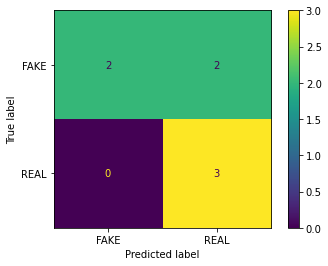

In [135]:
#this is a simple example of how to generate a confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#example hard-coded labels 
#pleas note, the dimension of these two arrays must be the same
actual_labels = ['REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE']
predicted_labels = ['REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE']

confusion_matrix = metrics.confusion_matrix(actual_labels, predicted_labels)

#make sure to make changes to the labels when you generate the confusion matrix for your classifier
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FAKE', 'REAL'])
cm_display.plot()
plt.show()